<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataScience2025/blob/main/20251223/%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 回帰分析

## 資料

20251223

https://github.com/yajima-yasutoshi/DataScience2025/tree/main/20251223



#講義の目的

回帰分析を理解し、Python 言語を用いた回帰分析のプログラミング手法を身に着ける。

#回帰分析の活用シーン

回帰分析は、最も基本的な予測モデルの一つである。
代表的な活用シーンには以下のケースがある。

* 需要予測  

 > コンビニやスーパーなどの小売り店では、将来売れる商品の数量を予測し、
 > それに基づき商品の仕入れが行われる。正確な予測をすることで、
 > 商品の売れ残りや、逆に商品が不足することが無いようにしている。
 > このようなシーンでは、回帰分析がもっとも基本的な技術として用いられいる。
 > 商品によっては、気温などの天候や曜日による影響を受け売れ行きが変動する
 > 場合もあるが、回帰分析を行うことでさまざまな影響を考慮にいれた
 > 需要予測を行うことが可能である。


* 来店客数の予測、問い合わせ件数の予測

  > 飲食店などのサービス業では、来店する利用者数の予測が重要である。利用者人数の予測に応じて、対応スタッフの人数や配置を決めることで、顧客に適切なサービスを提供している。
  > また、顧客からの問い合わせや商品の注文を電話で受ける**コールセンター**では、
  > 将来のコール数を予測して、それに応じてオペレーターの人数を決めている。
  > このような予測も回帰分析の技術を用いることで実現されている。


* ダイナミックプライシング

 > 鉄道や航空業界では、将来の需要を予測した上で便数や席数を最適化している。
 > さらに、需要に応じて価格を変動させることで利益を最適化することが
 > 広く行われており、**ダイナミックプライシング**と呼ばれている。
 > 回帰分析による予測がビジネスシーンで活用されている典型例となっている。



# 準備

## 環境の準備
以下のコードセルを実行し、
日本語の表示を行うための設定と分析に必要なパッケージのインポートを行う。

In [ ]:
# 日本語関係のツールのインストール
!pip install japanize-matplotlib

# 分析に必要なパッケージのインストール
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

---
---

# 回帰

## サンプルデータの読み込み

ある店舗で、日別の来店客数をその日の最高気温とともに記録したデータを使って説明する。
以下のコードセルを実行することで、
インターネット上に置かれた csv ファイルからデータを取得し、
df という変数のデータフレームにセットする。


In [ ]:
# インターネット上にあるファイルを指定する
url = 'https://raw.githubusercontent.com/yajima-yasutoshi/shunan-u/refs/heads/main/data/%E5%9B%9E%E5%B8%B0.csv'

# 今回は、df という変数に読み込むことにする
df = pd.read_csv(url)

df の先頭部分を head() を使い表示する。

In [ ]:
df.head()

## データの構造把握と基礎集計

### 構造の把握

データフレーム df に格納されたデータのサイズ（項目数やレコード数）、欠損値の有無、各列の型など info() を使い確認する。

In [ ]:
df.info()

上の結果から、
このデータは項目数が 3 で、
各項目には欠損値はないことが確認できる。

各項目の型は Dtype の部分を確認する。
Dtype と型の関係性は以下のとおりである。

Dtype | 型
-- | --
datetime?? | 日付型
int??, float?? | 数値型
object | カテゴリ型


shape によってデータのサイズを確認する。

In [ ]:
df.shape

最初の数値がレコード数、次の数値が項目数であるから、
レコード数が 10 であることが分かる。

### 統計量の確認

数値型の項目に対して統計量を確認する。
 describe() で確認できる。


In [ ]:
df.describe()

### 外れ値の確認

数値型の項目に関しては、boxplot で外れ値を確認する。

In [ ]:
# 最高気温と来店人数の箱ひげ図を横に並べて表示
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # 1行2列のグラフの1番目
sns.boxplot(x='最高気温', data=df)
plt.title('最高気温の箱ひげ図')
plt.xlabel('最高気温')

plt.subplot(1, 2, 2)  # 1行2列のグラフの2番目
sns.boxplot(x='来店人数', data=df)
plt.title('来店人数の箱ひげ図')
plt.xlabel('来店人数')

plt.tight_layout() # グラフ間のスペースを調整
plt.show()

どちらの項目にも外れ値はないと考えられる。

## 散布図を使った可視化

最高気温と来店人数の関係を散布図を使い可視化する。

In [ ]:
# データのプロット
# 元のデータをプロットします。
sns.scatterplot(data=df, x = '最高気温', y = '来店人数')
plt.title('データのプロット')
plt.xlabel('最高気温')
plt.ylabel('来店人数')
plt.grid() #グリッド線を表示する
plt.show()

この図からは、最高気温が上昇すると来店人数が増加する傾向が読み取れる。

## 回帰分析とは

回帰分析を行うことで、
上の例のような来店者数や最高気温といった数値型の項目間の関係性をデータから抽出し、
**その関係を計算式として得ることが可能となる。**
なお、ここでの計算式は**回帰式**と呼ばれる。
回帰式を用いることで、
例えば、
**明日の最高気温が 24.5 度である場合に来店者は何名か**
といった予測値を計算することも可能となる。

In [ ]:
# 元データのプロット
sns.scatterplot(data=df, x = '最高気温', y = '来店人数')
plt.title('データのプロット')
plt.xlabel('最高気温')
plt.ylabel('来店人数')
plt.grid(True) # グリッド線を追加
plt.axvline(x=24.5, color='red', linestyle='--') # 縦線を追加

plt.plot([24.5, 24.5], [570, 630], color='red', linestyle='-', linewidth=5)
plt.show()


## 変数

予測の対象となる項目を特に**目的変数**と呼ぶ。上の例では来店人数が目的変数となる。また、予測を計算する上で元となる項目を**説明変数**と呼ぶ。上の例では最高気温が
説明変数である。

回帰分析では、説明変数から
目的変数を計算するための**計算式**が得られる。この計算式は、**予測モデル** （あるいは単に**モデル**）とも呼ばれる。
モデルを構築することで、最高気温（**説明変数**）から来店人数（**目的変数**）を予測することが可能となる。


---
**重要なポイント**

* 回帰分析は、目的変数も説明変数も**数値型**の項目場合に用いられる手法である。

* 予測の対象（目的変数）は一つであるが、目的変数に影響を及ぼす説明変数は複数設定されることがほとんどである。
説明変数が1つの場合を**単回帰**、複数ある場合を**重回帰**と呼ぶ。

---



## 回帰を行うPythonコード

回帰を行うためには、以下のように sklearn ライブラリーから
LinearRegression をインポートする必要がある。

`from sklearn.linear_model import LinearRegression`

### 学習部分

モデルを作成する工程を**学習**と呼ぶ。
モデル作成に用いるデータを***学習（用）データ***と呼ぶ。

モデルの学習は以下の 2 つのステップで行う。

1.   準備：変数に LinearRegression() をセットし準備を行う
2.   学習： fit() 関数を使い学習データから回帰式の計算を行う

回帰分析の場合、学習を行う fit 関数を使うためには、
説明変数と目的変数を別々の変数にセットする必要がある。
以下では、
* 変数 X に説明変数
* 変数 y に目的変数

をセットする。

このようにした上で、fit 関数を
```
fit(X,y)
```
と実行する。


In [ ]:
#回帰に必要なモジュールのインポート
from sklearn.linear_model import LinearRegression

# 説明変数をXに設定し、目的変数を y に設定する。
X = df[['最高気温']]
y = df[['来店人数']]

# 回帰モデルの学習
# １．準備
# model という変数に回帰をセット
model = LinearRegression()

# ２．学習（訓練）
model.fit(X,y)

回帰分析では、説明変数から目的変数を計算する計算式（予測モデル）が生成される。
回帰分析で生成されたモデルを可視化すると以下のような直線となる。

In [ ]:
# 学習結果のプロット
# 学習によって得られた線をプロットします。
sns.scatterplot(data=df, x = '最高気温', y = '来店人数')
plt.plot(X, model.predict(X), color='red', label='回帰直線')
plt.title('データの散布図と回帰直線')
plt.xlabel('気温')
plt.ylabel('来店人数')
plt.grid(True) # グリッド線を追加
plt.show()

赤で示した回帰式は、
学習データに沿った直線となっていることが確認できる。

### 回帰係数

説明変数が1つのみの場合、回帰式として以下の数式が得られる。

目的変数 ＝ A × 説明変数 ＋ B

Aのことを**回帰係数** 、 Bを**切片**（あるいは**定数項**）と呼ぶ。

実際に計算された結果は、
以下の変数に格納されている。


*   回帰係数 ： model.coef_
*   切片 ： model.intersept_

実際に確かめる。


In [ ]:
# 回帰係数
model.coef_

In [ ]:
# 定数項
model.intercept_

したがって、回帰式は以下の数式となる。

来店人数 ＝ 23.2 × 最高気温 ＋ 36


回帰式は、説明変数と目的変数の間の関係を**定量的**に表している。
すなわち、
回帰係数が約 23 となっていることから、
最高気温が1度上昇すると来店人数が約 23 人増加することを意味している。


### 回帰直線の算出方法

回帰直線は学習データにできるだけ沿うように計算されている。
これには、
**最小二乗法**と呼ばれるアルゴリズムが用いられる。
ここでは詳細は説明しないが、
各学習データと回帰直線との差を二乗した上で総和を最小化することで計算される。
各学習データと回帰直線との差とは
以下の図の**点線部分の長さ**ことである。


In [ ]:
#@title  各点と回帰直線を結ぶ線分
import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

# 学習結果のプロット
# 学習によって得られた線をプロットします。
sns.scatterplot(data=df, x = '最高気温', y = '来店人数')
plt.plot(X, model.predict(X), color='red', label='回帰直線')
plt.title('各点と回帰直線を結ぶ線分')
plt.xlabel('気温')
plt.ylabel('来店人数')
plt.grid(True) # グリッド線を追加

# 各点と回帰直線の交点と点を結ぶ線分を追加
for i in range(len(df)):
    _x = df['最高気温'][i]
    df_x = pd.DataFrame( data={'最高気温': [_x]} )
    _y = df['来店人数'][i]
    _y_pred = model.predict(df_x)[0][0]  # 予測値を取得
    plt.plot([_x, _x], [_y, _y_pred], color='gray', linestyle='--', linewidth=1)

plt.show()

### 推論

回帰モデルを使って説明変数から目的変数の値を計算する工程を
**推論**と呼ぶ。
例えば、
最高気温が24.5度の時の来店人数は
以下のように計算される。

In [ ]:
model.coef_ * 24.5 + model.intercept_

さらに、回帰係数が正の値なので、最高気温が大きくなれば来店人数も増える予測となっていることが分かる。具体的には、最高気温が1度増えるごとに来店人数は約 23 人増加する。

推論を実行するための関数として predict を用いることが可能である。

例として、最高気温が 24.5 度の場合の来店人数を
predict 関数を使って予測する。

まず、以下のように、
予測したいデータをデータフレームとして準備するとよい。
このとき、
説明変数の項目名は学習データと同一の項目名（ここでの場合は「最高気温」）とする必要がある。
以下のセルを実行することで、1レコードのみのデータフレームを作成する。

In [ ]:
# 予測したいデータをデータフレームとして準備する
new_X = pd.DataFrame(
    data={'最高気温': [24.5]})
new_X

In [ ]:
# 推論ステップ
new_y = model.predict(new_X)
new_y

predict 関数を使うことで、最高気温が24.5度の場合には、来店人数が約606人と計算された。

予測された来店人数は、以下のように
横軸が 24.5 のときの直線の上の点の縦軸の座標の値となる。

In [ ]:
#@title 予測値のプロット
import matplotlib.pyplot as plt
# 予測結果をプロット
plt.scatter(X, y, label='学習データ')
plt.scatter(new_X, new_y, color='red', label='予測', s=150)  # sパラメータでサイズを調整
plt.plot(X, model.predict(X), color='red', label='回帰直線')

# 赤丸を通る縦線と横線を追加
plt.axvline(x=new_X['最高気温'][0], color='gray', linestyle='--')
plt.axhline(y=new_y[0][0], color='gray', linestyle='--')

plt.title('予測')
plt.xlabel('気温')
plt.ylabel('人数')
plt.legend()
plt.grid(True) # グリッド線を追加
plt.show()

## 精度の評価

構築された回帰モデルがどの程度正確に予測できるモデルなのか、
回帰モデルの精度を評価する方法を説明する。

精度を予測するためには、学習には用いなかったデータが必要となる。
そこで、
学習データとは別の日の最高気温と実際の客数を記録したデータ
を用いて回帰モデルの精度の評価を実施してみる。

まず、データを以下のように別の日のデータをデータフレームに読み込む。
ここでは変数名を df2 とした。


In [ ]:
#インターネット上のファイルを指定する
url = 'https://raw.githubusercontent.com/yajima-yasutoshi/shunan-u/refs/heads/main/data/%E5%9B%9E%E5%B8%B0%E6%A4%9C%E8%A8%BC.csv'

# df2 という変数に読み込むことにする
df2 = pd.read_csv(url)
df2

モデルを使い最高気温から来店人数を予測し、
実際の来店人数との差を基に精度の評価を行うこととする。

predict 関数は、複数のレコードに対応した予測を行うことが可能である。
以下では、
データフレーム df2 から最高気温の項目を X_test にセットし、predict 関数を用いて予測値を計算している。

In [ ]:
X_test = df2[['最高気温']]
y_pred = model.predict(X_test)
y_pred

精度を評価する際には、
この予測値を実績値と同じデータフレームに格納すると良い。
そこで、以下のように項目名を「予測人数」とし
データフレーム df2 に予測値を追加する。

In [ ]:
# 実績値と比較するために、1つのデータフレームにまとめる
df2['予測人数'] = y_pred
df2

予測した人数が実際の来店人数（実績値）に近くなれば、そのモデルは**精度が高い**モデルだと考えることができる。

### 平均二乗誤差（MSE：Mean Squared Error)

予測と実績との差の二乗を平均したものを**平均二乗誤差**と呼ぶ。
MSE と呼ぶことがある。
平均二乗誤差が小さいほど、精度の高いモデルだと判断される。
予測が完全に実績と等しくなれば、平均二乗誤差は0となる。

平均二乗誤差の計算には、以下のライブラリーを用いる。

`from sklearn.metrics import mean_squared_error`


In [ ]:
from sklearn.metrics import mean_squared_error
# 評価（MSE）
mse = mean_squared_error(df2['人数'], df2['予測人数'])
mse

In [ ]:
np.sqrt(mse)

上の例のように、平方根（ルート）を取る場合が多い。

### 決定係数（R2）

回帰モデルの精度評価には、他にもいくつか指標があり、**決定係数** も良く用いられる。

決定係数は 常に 1 以下の値で、予測が実績と一致した場合に 1 となるように計算される指標で、 1 に近いほど精度が高いことを意味する。

In [ ]:
from sklearn.metrics import r2_score
# 評価
r2 = r2_score(df2['人数'], df2['予測人数'])
r2

R2が上のようにマイナスの値なる場合は、予測精度が極めて悪いことを意味している。

## 検証用データを用いた精度の確認

予測モデルの精度を事前に確認するために、以下のように全データを「学習用データ」と「検証用データ」に分け、学習用データでモデルを構築し、検証用データで精度を確認することが一般的である。



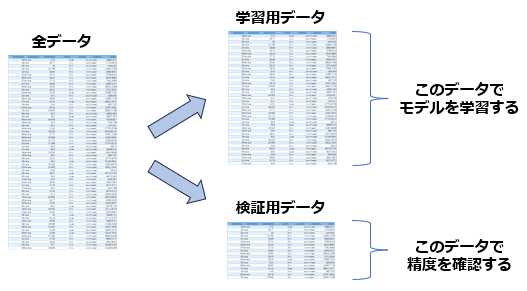

全データからランダムにデータ分割を行うための関数が用意されている。

```
from sklearn.model_selection import train_test_split
```

train_test_split は、以下のように使う。

```
A, B, C, D = train_test_split(X, y, test_size=0.2, random_state=1)
```

X にセットされた説明変数と、
y にセットされた目的変数がランダムに分割され、
以下のように各変数にデータがセットされる。

データ | 説明変数  | 目的変数
--     | --        | --
学習用データ | A | C
検証用データ | B | D

```
test_size = 0.2
```
と指定して検証用データを全体の 2 割にしている。

以下のコードセルでは、
全データを「学習用データ」と「検証用データ」に分けた後、
学習用データを使い回帰モデルを学習し、
検証用のデータで予測、
精度をMSEで評価している。

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Xには説明数、y には目的変数がセットされている

# データを学習用と検証用に分割
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=1)

# 線形回帰モデルの作成
model = LinearRegression()
model.fit(X_train, y_train)

# 検証用データで予測
y_pred = model.predict(X_validate)

# 評価（MSE）
mse = mean_squared_error(y_validate, y_pred)
mse

決定係数（R2）を評価指標とする場合の精度であれば、
以下のようになる。

In [ ]:
from sklearn.metrics import r2_score
# 評価
r2 = r2_score(y_validate, y_pred)
r2



---



---



# 重回帰
回帰分析では、複数の説明変数を用いる場合がほとんどである。
これを**重回帰**と呼ぶ。

## Tips データを用いた回帰の例

複数の説明変数のある回帰分析を行う。

Seaborn
パッケージに含まれている tips データセットを用いて説明する。

以下のセルを実行することで、
データをデータフレーム変数 df にセットする。

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# データセットを読み込む（ここではSeabornの内蔵データセット'tips'を使用）
df = sns.load_dataset('tips')

### データの説明
このデータは、あるレストランでのチップ金額（tip）のデータである。

主な項目は以下の通り。

項目 | 型 | 説明
-- | -- | --
total_bill | 数値 | 食事代の総額
tip        | 数値 | チップの額
sex        | カテゴリ | 性別
smoker     | カテゴリ | 喫煙者かどうか
day        | カテゴリ | 曜日
time       | カテゴリ | 時間帯が昼か夜か
size       | 数値 | 顧客サイズ（グループの人数）


このデータを使い、チップ金額を予測する回帰モデルを作ってみる。
すなわち

* 目的変数：チップ金額（tip）
* 説明変数：食事代の総額（total_bill）、グループの人数（size）、性別（sex）、など

である。

データの先頭を表示する。

In [ ]:
# データの先頭を表示して確認
df.head()

## 重回帰モデルの作成

まず、数値型の変数（'total_bill' と 'size'）
のみを用いて回帰モデルを作成し、その精度を平均二乗誤差で評価する。

下のコードセルでは、

1.   変数の選択
2.   データの分割
3.   モデルの構築
4.   精度の評価

を実行している。


In [ ]:
#必要なモジュールのインポート
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# １．説明変数と目的変数を選択
X = df[['total_bill', 'size']]
y = df['tip']

# ２．データを学習用と検証用に分割
# 検証用は全体の2割とする
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=0)

# ３．学習用データで重回帰モデルを作成する
model = LinearRegression()
model.fit(X_train, y_train)

# ４．検証用データで精度を評価する
# 検証用データで予測値を計算
y_pred = model.predict(X_validate)
# 実績と比較して評価（MSE）
mse = mean_squared_error(y_validate, y_pred)
mse

また、決定係数による評価は以下のように行えばよい。

In [ ]:
from sklearn.metrics import r2_score
# 検証用データで予測
r2 = r2_score(y_validate, y_pred)
r2

## 回帰係数の確認

重回帰モデルでは、説明変数毎に回帰係数が算出される。

すなわち、ここで計算された回帰式は

$$
\mbox{tip}  = a_1 \times \mbox{total_bill} + a_2 \times  \mbox{size} + c
$$

という形をしており、2つの説明変数それぞれに対応する回帰係数
$a_1, a_2$が得られる。

In [ ]:
model.coef_

最初の数値が 'total_bill'（合計金額） 、
次の数値が 'size' （顧客サイズ）に対応する回帰係数である。

回帰係数からは、構築した重回帰モデルでは、
 * 合計金額が 1 増加するとチップが約 0.084 増加する
 * 顧客サイズが 1 増加するとチップが約 0.2 増加する

ことが分かる。

## One-Hot エンコーディングによるカテゴリ変数を使った回帰

数値型の項目だけでなく、
性別（sex）、曜日（day）など
カテゴリ型の項目も説明変数に用いるための方法について説明する。

カテゴリ項目を説明変数に利用できるよう変換する方法として、
**One-Hot エンコーディング**
と呼ばれる方法が用いられる。

まず、カテゴリ項目 day にはどのような値があるか確認する。

In [ ]:
df['day'].unique()

項目「day」には、
'Sun', 'Sat', 'Thur', 'Fri'
の4個のカテゴリ値があることが分かる。

このままでは数値でないため、回帰の説明変数に用いることができない。
そこで、4個のカテゴリ値に対応した4つの数値型の項目
* day_Thur
* day_Fri
* day_Sat
* day_Sun

を用意して、以下の表のように 0 か 1 の数値を割り当てる。

カテゴリ値 | day_Thur	| day_Fri	| day_Sat	| day_Sun
-- | -- | -- | -- | --
Thur | 1 | 0 | 0 | 0
Fri | 0 | 1 | 0 | 0
Sat | 0 | 0 | 1 | 0
Sun | 0 | 0 | 0 | 1

このようにカテゴリ型の項目を複数の数値型の項目
で置き換える方法を
**one-hot エンコーディング**
と呼ぶ。

数値型の項目であれば、回帰モデルの説明変数として使うことが可能である。



カテゴリ型の項目名を以下のように指定することで、
自動的に必要な項目がデータフレームとして生成される。

```
get_dummies(df[['day']])
```



In [ ]:
pd.get_dummies(df[['day']])

上の例では、True、Flase と表示されているが、
内部的には True は 1 、Flase は 0 の数値として扱われる。

複数のカテゴリ項目を一度に変換することも可能で、
以下のように実行する。

In [ ]:
pd.get_dummies(df[['sex', 'smoker', 'day', 'time']] )

回帰モデルを構築するためには、one-hot エンコーディングにより作られたデータフレームを、元のデータフレーム変数 df に追加するとよい。

追加には、concat という関数が利用できる。
データフレーム A の右側に データフレーム B
を繋げる場合には、以下のように実行する。

```
pd.concat([A, B], axis=1)
```

In [ ]:
# データの読み込み
df = sns.load_dataset('tips')

# カテゴリ変数をOne-Hotエンコーディング
# encoded_df = pd.get_dummies(df[['sex', 'smoker', 'day', 'time']], drop_first=True)
encoded_df = pd.get_dummies(df[['sex', 'smoker', 'day', 'time']])

# エンコードされたデータと元のデータを結合
df = pd.concat([df, encoded_df], axis=1)
df

データフレーム df から説明変数と目的変数と選び、
それぞれ X と y にセットし重回帰を行う。
最後に、検証用データを使い精度を評価する。

In [ ]:
# 説明変数と目的変数を選択
X = df[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']]
y = df['tip']

# データを訓練セットとテストセットに分割
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=0)

# 線形回帰モデルの作成と訓練
model = LinearRegression()
model.fit(X_train, y_train)

# 検証データで予測
y_pred = model.predict(X_validate)

# 平均二乗誤差による評価（MSE）
mse = mean_squared_error(y_validate, y_pred)
print('MSE: ', mse)

# 決定係数による評価（R2）
r2 = r2_score(y_validate, y_pred)
print('R2: ', r2)


また、回帰係数を確認すると以下のようになる。

In [ ]:
# 回帰係数をデータフレームに格納
coef_df = pd.DataFrame({'説明変数': X.columns, '回帰係数': model.coef_})
coef_df

In [ ]:
sns.barplot(coef_df, y='説明変数', x='回帰係数')

ここからは、例えば、チップが多くなることは、

* Female（女性）
* smoker_No（喫煙しない）
* day_Fri（金曜日）、day_Sun（土曜日）
* time_Lunch（ランチ）

と関連がありそうだと思われる。

#回帰モデル構築全体の流れ

回帰モデル構築の流れは以下のようになる。

0. データの確認とクレンジング

  データの全体構造を把握し、欠損値や異常値の処理を行う。

1. 変数の設定

  説明変数と目的変数を設定する。

2. データの分割

  データ全体を、学習用データと評価用データに分割する。
    train_test_split() を利用する。

3. モデルの学習

   モデル変数に LinearRegression() をセットし、
   学習用データを用いてモデルを構築する。学習には fit() を使う。

4. 評価用データでモデルの精度を評価

   1. 評価用の説明変数で予測を行う。predict() を使う。
   2. 予測と検証用データとを比較して精度を求める。

   を使う。
   精度評価の指標として平均二乗誤差を用いるのであれば mean_squared_error() 、
   決定係数であれば r2_score() を用いる。

